currently running on:
```
conda env with python 3.11.4
pip install pandas
pip install torch torchvision torchaudio
pip install ultralytics
pip install pydantic
```

In [22]:
from ultralytics import YOLO
import cv2
import numpy as np
from pydantic import BaseModel

Notas importantes:

Nombres de puntos clave:
```
    NOSE:           0
    LEFT EYE:       1
    RIGHT EYE:      2
    LEFT EAR:       3
    RIGHT EAR:      4
    LEFT SHOULDER:  5
    RIGHT SHOULDER: 6
    LEFT ELBOW:     7
    RIGHT ELBOW:    8
    LEFT HAND:      9
    RIGHT HAND:     10
    LEFT HIP:       11
    RIGHT HIP:      12
    LEFT KNEE:      13
    RIGHT KNEE:     14
    LEFT ANKLE:     15
    RIGHT ANKLE:    16`
    
```

In [23]:
def is_raising_hand(keypoints):
    nose = keypoints[0]
    left_hand = keypoints[9]
    right_hand = keypoints[10]
    
    if(left_hand[1] < nose[1] or right_hand[1] < nose[1]):
        return True
    return False

def look4face(keypoints):
    left_shoulder = keypoints[5]
    right_shoulder = keypoints[6]
    nose = keypoints[0]
    
    down = int(max(left_shoulder[1], right_shoulder[1]))
    left = int(left_shoulder[0])
    right = int(right_shoulder[0])
    up = int(down + 3*(nose[1] - down))
    
    return (left, up), (right, down)

In [29]:

model = YOLO('yolov8n-pose.pt')
video = r'C:\Users\elias\Dropbox\Carrera\7mo Semestre\Bloque 2\StudentVisionClassIA\PoseDetection\media\VideoRomoEliasDiego.mp4'
cap = cv2.VideoCapture(video)
# print('pollo loco')


In [30]:

count = 0
while cap.isOpened():
    ret , frame = cap.read()
    # if not ret: break
    results = model.predict(frame, conf=0.65, show=False)
    frame = results[0].plot(boxes=True)
    
    if results[0]: # Verificar si hay detecciones
        for person in results[0]: # Recorrer la lista de objetos (Personas) detectados

            keypoints = person.keypoints.xy.cpu().numpy()[0]

            
            if(is_raising_hand(keypoints)):
                print('Pollo Loco')
                left_up, right_down = look4face(keypoints)
                cv2.rectangle(frame, left_up, right_down, (255, 0, 0), 3)
            
            # cv2.putText(frame, st_str,
            #             st,
            #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 3 persons, 637.0ms
Speed: 11.5ms preprocess, 637.0ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1346.6ms
Speed: 27.7ms preprocess, 1346.6ms inference, 38.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 982.8ms
Speed: 28.7ms preprocess, 982.8ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 397.3ms
Speed: 15.1ms preprocess, 397.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1126.9ms
Speed: 8.8ms preprocess, 1126.9ms inference, 21.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1480.8ms
Speed: 41.0ms preprocess, 1480.8ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 753.1ms
Speed: 116.5ms preprocess, 753.1ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 539.3ms
Speed: 11.6ms preprocess, 539.3ms inference, 4.1ms

Pollo Loco


0: 384x640 3 persons, 403.0ms
Speed: 11.6ms preprocess, 403.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 404.2ms
Speed: 9.6ms preprocess, 404.2ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 345.2ms
Speed: 8.5ms preprocess, 345.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 352.5ms
Speed: 7.1ms preprocess, 352.5ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 389.8ms
Speed: 9.0ms preprocess, 389.8ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 379.5ms
Speed: 6.6ms preprocess, 379.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 439.7ms
Speed: 10.5ms preprocess, 439.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 358.8ms
Speed: 6.5ms preprocess, 358.8ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 428.6ms
Speed: 8.1ms preprocess, 428.6ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 585.2ms
Speed: 9.5ms preprocess, 585.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 478.7ms
Speed: 9.6ms preprocess, 478.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 444.6ms
Speed: 10.1ms preprocess, 444.6ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 478.1ms
Speed: 8.6ms preprocess, 478.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 465.6ms
Speed: 8.6ms preprocess, 465.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 389.2ms
Speed: 7.5ms preprocess, 389.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 818.4ms
Speed: 8.0ms preprocess, 818.4ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 1890.3ms
Speed: 9.5ms preprocess, 1890.3ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 946.3ms
Speed: 38.4ms preprocess, 946.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 424.9ms
Speed: 10.5ms preprocess, 424.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 420.6ms
Speed: 6.5ms preprocess, 420.6ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 369.9ms
Speed: 6.6ms preprocess, 369.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 373.3ms
Speed: 8.6ms preprocess, 373.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 382.7ms
Speed: 8.6ms preprocess, 382.7ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 363.6ms
Speed: 6.6ms preprocess, 363.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 403.5ms
Speed: 8.6ms preprocess, 403.5ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 436.0ms
Speed: 7.5ms preprocess, 436.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 362.2ms
Speed: 8.6ms preprocess, 362.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 371.7ms
Speed: 10.6ms preprocess, 371.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 469.7ms
Speed: 7.0ms preprocess, 469.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 989.5ms
Speed: 9.5ms preprocess, 989.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 1081.7ms
Speed: 29.8ms preprocess, 1081.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 786.8ms
Speed: 9.5ms preprocess, 786.8ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 636.1ms
Speed: 28.7ms preprocess, 636.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 400.0ms
Speed: 6.6ms preprocess, 400.0ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 490.1ms
Speed: 25.6ms preprocess, 490.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 733.7ms
Speed: 9.7ms preprocess, 733.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 481.9ms
Speed: 8.0ms preprocess, 481.9ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 345.1ms
Speed: 8.0ms preprocess, 345.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 360.4ms
Speed: 9.5ms preprocess, 360.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 331.1ms
Speed: 8.6ms preprocess, 331.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 309.9ms
Speed: 8.6ms preprocess, 309.9ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 299.9ms
Speed: 6.5ms preprocess, 299.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 273.6ms
Speed: 7.0ms preprocess, 273.6ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 320.9ms
Speed: 9.1ms preprocess, 320.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 357.9ms
Speed: 10.1ms preprocess, 357.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 316.9ms
Speed: 7.5ms preprocess, 316.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 329.3ms
Speed: 6.2ms preprocess, 329.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 269.8ms
Speed: 5.0ms preprocess, 269.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 263.3ms
Speed: 7.0ms preprocess, 263.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 252.3ms
Speed: 6.6ms preprocess, 252.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 242.1ms
Speed: 6.0ms preprocess, 242.1ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 246.1ms
Speed: 5.5ms preprocess, 246.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 256.5ms
Speed: 5.5ms preprocess, 256.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 250.9ms
Speed: 6.6ms preprocess, 250.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 367.9ms
Speed: 6.5ms preprocess, 367.9ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 253.5ms
Speed: 6.0ms preprocess, 253.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 222.9ms
Speed: 5.5ms preprocess, 222.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 253.2ms
Speed: 4.5ms preprocess, 253.2ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 247.5ms
Speed: 5.5ms preprocess, 247.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 248.4ms
Speed: 6.5ms preprocess, 248.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 257.3ms
Speed: 6.0ms preprocess, 257.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 241.7ms
Speed: 6.0ms preprocess, 241.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 228.6ms
Speed: 6.0ms preprocess, 228.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 232.6ms
Speed: 6.5ms preprocess, 232.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 242.6ms
Speed: 5.5ms preprocess, 242.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 253.4ms
Speed: 7.0ms preprocess, 253.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 225.1ms
Speed: 6.0ms preprocess, 225.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 257.4ms
Speed: 6.0ms preprocess, 257.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 255.7ms
Speed: 6.5ms preprocess, 255.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 245.7ms
Speed: 5.0ms preprocess, 245.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 247.6ms
Speed: 6.5ms preprocess, 247.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 302.8ms
Speed: 7.5ms preprocess, 302.8ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 256.1ms
Speed: 7.6ms preprocess, 256.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 253.2ms
Speed: 7.5ms preprocess, 253.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 243.4ms
Speed: 6.1ms preprocess, 243.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 251.6ms
Speed: 4.0ms preprocess, 251.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 228.9ms
Speed: 6.0ms preprocess, 228.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 232.7ms
Speed: 4.0ms preprocess, 232.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 233.2ms
Speed: 4.0ms preprocess, 233.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 242.5ms
Speed: 6.8ms preprocess, 242.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 272.2ms
Speed: 7.6ms preprocess, 272.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 288.3ms
Speed: 6.6ms preprocess, 288.3ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 332.4ms
Speed: 6.6ms preprocess, 332.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 403.3ms
Speed: 7.6ms preprocess, 403.3ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 419.6ms
Speed: 10.6ms preprocess, 419.6ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 382.5ms
Speed: 8.1ms preprocess, 382.5ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 417.5ms
Speed: 8.1ms preprocess, 417.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 367.2ms
Speed: 8.5ms preprocess, 367.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 316.4ms
Speed: 9.6ms preprocess, 316.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 358.6ms
Speed: 6.6ms preprocess, 358.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 297.7ms
Speed: 6.6ms preprocess, 297.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 356.5ms
Speed: 8.0ms preprocess, 356.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 436.6ms
Speed: 7.0ms preprocess, 436.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 347.2ms
Speed: 7.0ms preprocess, 347.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 387.1ms
Speed: 8.7ms preprocess, 387.1ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 303.4ms
Speed: 7.5ms preprocess, 303.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 362.2ms
Speed: 7.5ms preprocess, 362.2ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 367.0ms
Speed: 8.6ms preprocess, 367.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 351.1ms
Speed: 7.6ms preprocess, 351.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 400.3ms
Speed: 7.6ms preprocess, 400.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 301.6ms
Speed: 7.5ms preprocess, 301.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 266.4ms
Speed: 6.5ms preprocess, 266.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 262.8ms
Speed: 5.5ms preprocess, 262.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 299.3ms
Speed: 6.5ms preprocess, 299.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 341.5ms
Speed: 8.6ms preprocess, 341.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 364.7ms
Speed: 7.5ms preprocess, 364.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 363.3ms
Speed: 10.1ms preprocess, 363.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 343.3ms
Speed: 10.6ms preprocess, 343.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 306.6ms
Speed: 5.5ms preprocess, 306.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 588.2ms
Speed: 180.1ms preprocess, 588.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 330.5ms
Speed: 9.5ms preprocess, 330.5ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 410.9ms
Speed: 6.5ms preprocess, 410.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 417.5ms
Speed: 8.6ms preprocess, 417.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 375.3ms
Speed: 6.1ms preprocess, 375.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 343.8ms
Speed: 10.6ms preprocess, 343.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 354.7ms
Speed: 5.0ms preprocess, 354.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 432.4ms
Speed: 11.6ms preprocess, 432.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 351.7ms
Speed: 7.6ms preprocess, 351.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 363.6ms
Speed: 10.6ms preprocess, 363.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 331.9ms
Speed: 8.6ms preprocess, 331.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 344.7ms
Speed: 8.6ms preprocess, 344.7ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 369.4ms
Speed: 10.6ms preprocess, 369.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 342.9ms
Speed: 7.6ms preprocess, 342.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 441.7ms
Speed: 8.6ms preprocess, 441.7ms inference, 11.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 434.1ms
Speed: 6.5ms preprocess, 434.1ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 402.9ms
Speed: 7.1ms preprocess, 402.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 554.4ms
Speed: 9.1ms preprocess, 554.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 360.6ms
Speed: 9.5ms preprocess, 360.6ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 318.7ms
Speed: 5.0ms preprocess, 318.7ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 334.6ms
Speed: 7.0ms preprocess, 334.6ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 313.1ms
Speed: 5.0ms preprocess, 313.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 318.1ms
Speed: 6.0ms preprocess, 318.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 363.6ms
Speed: 11.9ms preprocess, 363.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 374.7ms
Speed: 7.6ms preprocess, 374.7ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 403.8ms
Speed: 8.0ms preprocess, 403.8ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 338.3ms
Speed: 7.0ms preprocess, 338.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 302.1ms
Speed: 6.5ms preprocess, 302.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 366.8ms
Speed: 5.5ms preprocess, 366.8ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 331.8ms
Speed: 7.0ms preprocess, 331.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 339.0ms
Speed: 7.5ms preprocess, 339.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 556.0ms
Speed: 16.7ms preprocess, 556.0ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 423.7ms
Speed: 6.6ms preprocess, 423.7ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 381.1ms
Speed: 7.7ms preprocess, 381.1ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 346.7ms
Speed: 8.5ms preprocess, 346.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 332.0ms
Speed: 5.5ms preprocess, 332.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 323.4ms
Speed: 8.5ms preprocess, 323.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 434.7ms
Speed: 8.6ms preprocess, 434.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 449.7ms
Speed: 7.5ms preprocess, 449.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 555.2ms
Speed: 16.6ms preprocess, 555.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 487.9ms
Speed: 10.1ms preprocess, 487.9ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 607.8ms
Speed: 7.0ms preprocess, 607.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 885.7ms
Speed: 12.4ms preprocess, 885.7ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 1152.0ms
Speed: 9.6ms preprocess, 1152.0ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 1249.1ms
Speed: 28.2ms preprocess, 1249.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 630.5ms
Speed: 136.8ms preprocess, 630.5ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 427.3ms
Speed: 8.1ms preprocess, 427.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 324.0ms
Speed: 7.0ms preprocess, 324.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 399.5ms
Speed: 8.6ms preprocess, 399.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 409.1ms
Speed: 9.6ms preprocess, 409.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 485.4ms
Speed: 9.5ms preprocess, 485.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 499.7ms
Speed: 10.6ms preprocess, 499.7ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 426.9ms
Speed: 6.0ms preprocess, 426.9ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 470.1ms
Speed: 13.6ms preprocess, 470.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 837.5ms
Speed: 8.6ms preprocess, 837.5ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 683.8ms
Speed: 10.6ms preprocess, 683.8ms inference, 43.4ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 518.8ms
Speed: 15.6ms preprocess, 518.8ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 442.3ms
Speed: 8.6ms preprocess, 442.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 452.3ms
Speed: 8.6ms preprocess, 452.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 476.4ms
Speed: 12.6ms preprocess, 476.4ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 501.6ms
Speed: 10.1ms preprocess, 501.6ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 466.3ms
Speed: 8.6ms preprocess, 466.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 414.8ms
Speed: 8.5ms preprocess, 414.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 342.6ms
Speed: 8.0ms preprocess, 342.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 348.1ms
Speed: 7.5ms preprocess, 348.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 364.1ms
Speed: 8.6ms preprocess, 364.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 318.8ms
Speed: 7.0ms preprocess, 318.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 320.2ms
Speed: 7.0ms preprocess, 320.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 332.8ms
Speed: 5.6ms preprocess, 332.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 333.1ms
Speed: 8.6ms preprocess, 333.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 362.4ms
Speed: 8.6ms preprocess, 362.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 364.8ms
Speed: 7.6ms preprocess, 364.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 465.5ms
Speed: 7.5ms preprocess, 465.5ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 449.2ms
Speed: 9.6ms preprocess, 449.2ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 490.4ms
Speed: 8.6ms preprocess, 490.4ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 499.0ms
Speed: 9.6ms preprocess, 499.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 507.4ms
Speed: 8.6ms preprocess, 507.4ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 493.5ms
Speed: 9.6ms preprocess, 493.5ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 497.3ms
Speed: 9.6ms preprocess, 497.3ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 374.0ms
Speed: 8.6ms preprocess, 374.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 301.0ms
Speed: 6.5ms preprocess, 301.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 287.0ms
Speed: 8.5ms preprocess, 287.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 324.3ms
Speed: 8.5ms preprocess, 324.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 296.9ms
Speed: 6.0ms preprocess, 296.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 328.3ms
Speed: 6.0ms preprocess, 328.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 298.5ms
Speed: 9.6ms preprocess, 298.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 273.1ms
Speed: 7.0ms preprocess, 273.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 270.6ms
Speed: 7.0ms preprocess, 270.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 292.1ms
Speed: 7.5ms preprocess, 292.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 304.7ms
Speed: 7.2ms preprocess, 304.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 447.3ms
Speed: 7.0ms preprocess, 447.3ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 298.7ms
Speed: 7.6ms preprocess, 298.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 262.8ms
Speed: 9.0ms preprocess, 262.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 288.4ms
Speed: 7.0ms preprocess, 288.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 306.3ms
Speed: 7.0ms preprocess, 306.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 278.9ms
Speed: 7.8ms preprocess, 278.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 295.3ms
Speed: 8.0ms preprocess, 295.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 296.4ms
Speed: 8.6ms preprocess, 296.4ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 338.9ms
Speed: 9.5ms preprocess, 338.9ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 350.8ms
Speed: 7.1ms preprocess, 350.8ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 343.3ms
Speed: 6.5ms preprocess, 343.3ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 358.4ms
Speed: 8.4ms preprocess, 358.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 313.1ms
Speed: 9.6ms preprocess, 313.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 282.8ms
Speed: 5.5ms preprocess, 282.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 293.1ms
Speed: 5.5ms preprocess, 293.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 365.2ms
Speed: 6.6ms preprocess, 365.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 293.4ms
Speed: 7.5ms preprocess, 293.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 327.6ms
Speed: 6.0ms preprocess, 327.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 320.0ms
Speed: 9.6ms preprocess, 320.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 358.4ms
Speed: 4.0ms preprocess, 358.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 402.3ms
Speed: 9.6ms preprocess, 402.3ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 374.8ms
Speed: 9.0ms preprocess, 374.8ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 372.0ms
Speed: 7.0ms preprocess, 372.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 277.8ms
Speed: 6.5ms preprocess, 277.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 258.1ms
Speed: 7.6ms preprocess, 258.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 314.4ms
Speed: 7.5ms preprocess, 314.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 351.1ms
Speed: 7.5ms preprocess, 351.1ms inference, 3.0ms postprocess per i

Pollo Loco


0: 384x640 3 persons, 266.7ms
Speed: 0.0ms preprocess, 266.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 204.0ms
Speed: 0.0ms preprocess, 204.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 188.4ms
Speed: 15.6ms preprocess, 188.4ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 241.7ms
Speed: 31.3ms preprocess, 241.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 282.5ms
Speed: 0.0ms preprocess, 282.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 276.9ms
Speed: 6.1ms preprocess, 276.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 235.5ms
Speed: 0.0ms preprocess, 235.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 203.5ms
Speed: 12.5ms preprocess, 203.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 188.5ms
Speed: 15.6ms preprocess, 188.5ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 235.2ms
Speed: 15.6ms preprocess, 235.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 204.1ms
Speed: 10.0ms preprocess, 204.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 248.6ms
Speed: 1.4ms preprocess, 248.6ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 220.3ms
Speed: 7.5ms preprocess, 220.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 219.7ms
Speed: 0.0ms preprocess, 219.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 250.9ms
Speed: 0.0ms preprocess, 250.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 235.9ms
Speed: 0.0ms preprocess, 235.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 194.5ms
Speed: 6.0ms preprocess, 194.5ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 219.7ms
Speed: 15.6ms preprocess, 219.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 250.9ms
Speed: 0.0ms preprocess, 250.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 188.0ms
Speed: 0.0ms preprocess, 188.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 188.4ms


Pollo Loco


Speed: 0.0ms preprocess, 188.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 188.4ms
Speed: 0.0ms preprocess, 188.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 188.6ms
Speed: 0.0ms preprocess, 188.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 172.6ms


Pollo Loco


Speed: 0.0ms preprocess, 172.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 172.8ms


Pollo Loco


Speed: 0.0ms preprocess, 172.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 157.1ms
Speed: 0.0ms preprocess, 157.1ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)


Pollo Loco
Pollo Loco



0: 384x640 3 persons, 157.5ms
Speed: 0.0ms preprocess, 157.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 157.3ms
Speed: 15.6ms preprocess, 157.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Pollo Loco
Pollo Loco



0: 384x640 3 persons, 172.8ms
Speed: 0.0ms preprocess, 172.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 172.8ms
Speed: 0.0ms preprocess, 172.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Pollo Loco
Pollo Loco



0: 384x640 3 persons, 157.2ms
Speed: 0.0ms preprocess, 157.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 141.6ms
Speed: 15.6ms preprocess, 141.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Pollo Loco



0: 384x640 3 persons, 157.1ms
Speed: 0.0ms preprocess, 157.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco
Pollo Loco


0: 384x640 3 persons, 156.8ms
Speed: 0.0ms preprocess, 156.8ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 147.6ms
Speed: 0.0ms preprocess, 147.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco
Pollo Loco


0: 384x640 3 persons, 141.0ms
Speed: 15.6ms preprocess, 141.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 156.7ms
Speed: 0.0ms preprocess, 156.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Pollo Loco
Pollo Loco



0: 384x640 3 persons, 156.7ms
Speed: 0.0ms preprocess, 156.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 156.7ms
Speed: 0.0ms preprocess, 156.7ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 192.0ms
Speed: 0.0ms preprocess, 192.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 178.2ms
Speed: 1.0ms preprocess, 178.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 203.7ms
Speed: 0.0ms preprocess, 203.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 298.2ms
Speed: 0.0ms preprocess, 298.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 243.1ms
Speed: 9.5ms preprocess, 243.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 204.1ms
Speed: 0.0ms preprocess, 204.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 204.0ms
Speed: 0.0ms preprocess, 204.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 157.1ms


Pollo Loco


Speed: 0.0ms preprocess, 157.1ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 172.8ms
Speed: 0.0ms preprocess, 172.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Pollo Loco



0: 384x640 3 persons, 172.7ms


Pollo Loco


Speed: 15.6ms preprocess, 172.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 170.8ms
Speed: 0.0ms preprocess, 170.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco
Pollo Loco


0: 384x640 3 persons, 156.9ms
Speed: 0.0ms preprocess, 156.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 141.1ms
Speed: 6.0ms preprocess, 141.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco
Pollo Loco


0: 384x640 3 persons, 141.6ms
Speed: 15.6ms preprocess, 141.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 172.7ms
Speed: 0.0ms preprocess, 172.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 157.3ms
Speed: 0.0ms preprocess, 157.3ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)


Pollo Loco
Pollo Loco



0: 384x640 3 persons, 172.8ms
Speed: 0.0ms preprocess, 172.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 172.3ms
Speed: 9.0ms preprocess, 172.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 173.0ms
Speed: 0.0ms preprocess, 173.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 188.4ms
Speed: 15.6ms preprocess, 188.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 172.3ms


Pollo Loco


Speed: 14.5ms preprocess, 172.3ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 172.7ms
Speed: 0.0ms preprocess, 172.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 157.2ms
Speed: 15.6ms preprocess, 157.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Pollo Loco


Pollo Loco


0: 384x640 3 persons, 172.8ms
Speed: 0.0ms preprocess, 172.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 231.0ms
Speed: 62.5ms preprocess, 231.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 235.2ms
Speed: 0.0ms preprocess, 235.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 251.4ms
Speed: 0.0ms preprocess, 251.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 251.0ms
Speed: 15.6ms preprocess, 251.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 223.8ms
Speed: 0.0ms preprocess, 223.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 251.2ms
Speed: 0.0ms preprocess, 251.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 225.5ms
Speed: 0.0ms preprocess, 225.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 175.2ms


Pollo Loco


Speed: 5.0ms preprocess, 175.2ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 172.3ms


Pollo Loco


Speed: 7.4ms preprocess, 172.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 169.6ms
Speed: 0.0ms preprocess, 169.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 159.2ms


Pollo Loco


Speed: 0.0ms preprocess, 159.2ms inference, 9.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 149.9ms
Speed: 0.0ms preprocess, 149.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco
Pollo Loco


0: 384x640 3 persons, 175.0ms
Speed: 5.0ms preprocess, 175.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 190.9ms
Speed: 9.6ms preprocess, 190.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 218.6ms
Speed: 0.0ms preprocess, 218.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 219.7ms
Speed: 0.0ms preprocess, 219.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 330.3ms
Speed: 15.6ms preprocess, 330.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 235.9ms
Speed: 0.0ms preprocess, 235.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 204.0ms
Speed: 15.6ms preprocess, 204.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 267.0ms
Speed: 0.0ms preprocess, 267.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 361.2ms
Speed: 0.0ms preprocess, 361.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 282.6ms
Speed: 0.0ms preprocess, 282.6ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 269.3ms
Speed: 13.2ms preprocess, 269.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Pollo Loco


0: 384x640 3 persons, 251.7ms
Speed: 15.6ms preprocess, 251.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Pollo Loco



image 1/1 C:\Users\elias\Dropbox\Carrera\7mo Semestre\Bloque 2\StudentVisionClassIA\PoseDetection\media\ROmo.jpg: 640x384 1 person, 145.3ms
Speed: 2.0ms preprocess, 145.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)


True


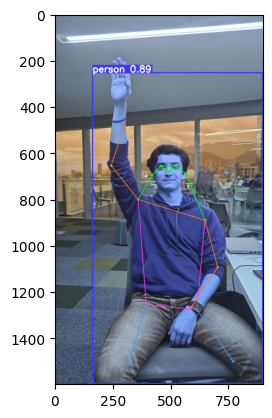

In [10]:
import matplotlib.pyplot as plt
results = model.predict(r'C:\Users\elias\Dropbox\Carrera\7mo Semestre\Bloque 2\StudentVisionClassIA\PoseDetection\media\ROmo.jpg', conf=0.65, show=False)
frame = results[0].plot(boxes=True)
r = results[0]

keypoints = r.keypoints.xy.cpu().numpy()[0]
nose = keypoints[0]
left_hand = keypoints[9]
right_hand = keypoints[10]

print(is_raising_hand(keypoints))
plt.imshow(frame)



image 1/1 C:\Users\elias\Dropbox\Carrera\7mo Semestre\Bloque 2\StudentVisionClassIA\PoseDetection\media\Fer.jpg: 640x384 1 person, 81.8ms
Speed: 1.4ms preprocess, 81.8ms inference, 12.9ms postprocess per image at shape (1, 3, 640, 384)


False


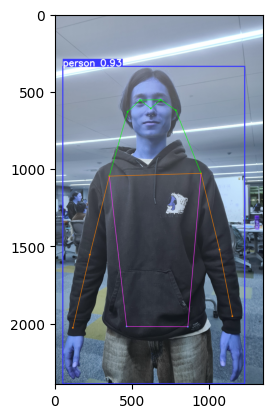

In [11]:
import matplotlib.pyplot as plt
results = model.predict(r'C:\Users\elias\Dropbox\Carrera\7mo Semestre\Bloque 2\StudentVisionClassIA\PoseDetection\media\Fer.jpg', conf=0.65, show=False)
frame = results[0].plot(boxes=True)
r = results[0]

keypoints = r.keypoints.xy.cpu().numpy()[0]
nose = keypoints[0]
left_hand = keypoints[9]
right_hand = keypoints[10]

print(is_raising_hand(keypoints))
plt.imshow(frame)


In [8]:
left_hand, right_hand, nose

(array([     1147.3,      1954.3], dtype=float32),
 array([     115.56,      2029.3], dtype=float32),
 array([     619.59,      610.46], dtype=float32))

In [ ]:
video = r'C:\Users\elias\Dropbox\Carrera\7mo Semestre\Bloque 2\StudentVisionClassIA\PoseDetection\media\VideoRomoEliasDiego.mp4'
cap = cv2.VideoCapture(video)
print('pollo loco')

original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
original_height, original_width